In [65]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
df = pd.read_csv("/content/Marketing Team Data - Sheet1.csv")
df.head()

,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR in %),Unique Click-Through Rate (Unique CTR in %),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR),@dropdown,@dropdown.1
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,2.09,3.57,"$1,092.24",$2.24,$6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,3.09,4.29,$835.46,$1.73,$5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,3.15,5.06,$319.38,$1.61,$4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,2.59,4.50,$86.25,$1.76,$4.11,NaN,NaN
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,6.62,6.72,"$1,193.94",$0.46,$1.09,NaN,NaN


#Data Preprocessing

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   campaign ID                                  33 non-null     object 
 1   Campaign Name                                33 non-null     object 
 2   Audience                                     33 non-null     object 
 3   Age                                          33 non-null     object 
 4   Geography                                    33 non-null     object 
 5   Reach                                        33 non-null     int64  
 6   Impressions                                  33 non-null     int64  
 7   Frequency                                    33 non-null     float64
 8   Clicks                                       33 non-null     int64  
 9   Unique Clicks                                33 non-null     int64  
 10  Uniq

###Dropping last two cloumns because of no use

In [68]:
df.drop(columns=['@dropdown', '@dropdown.1'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   campaign ID                                  33 non-null     object 
 1   Campaign Name                                33 non-null     object 
 2   Audience                                     33 non-null     object 
 3   Age                                          33 non-null     object 
 4   Geography                                    33 non-null     object 
 5   Reach                                        33 non-null     int64  
 6   Impressions                                  33 non-null     int64  
 7   Frequency                                    33 non-null     float64
 8   Clicks                                       33 non-null     int64  
 9   Unique Clicks                                33 non-null     int64  
 10  Uniq

Above we see last three columns have **Object** Datatype. So we are converting them into float to perform functions on them

In [69]:
#For Amount Spent in INR Column;
df["Amount Spent in INR"] = (
    df["Amount Spent in INR"]
    .str.replace('$', '', regex = False)
    .str.replace(",", "", regex = False)
    .astype(float)
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   campaign ID                                  33 non-null     object 
 1   Campaign Name                                33 non-null     object 
 2   Audience                                     33 non-null     object 
 3   Age                                          33 non-null     object 
 4   Geography                                    33 non-null     object 
 5   Reach                                        33 non-null     int64  
 6   Impressions                                  33 non-null     int64  
 7   Frequency                                    33 non-null     float64
 8   Clicks                                       33 non-null     int64  
 9   Unique Clicks                                33 non-null     int64  
 10  Uniq

###For others, we are going to run For Loop

In [70]:
cols = ['Cost Per Click (CPC)', 'Cost per Result (CPR)']
for col in cols:
    df[col] = df[col].str.replace("$", "", regex=False).astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   campaign ID                                  33 non-null     object 
 1   Campaign Name                                33 non-null     object 
 2   Audience                                     33 non-null     object 
 3   Age                                          33 non-null     object 
 4   Geography                                    33 non-null     object 
 5   Reach                                        33 non-null     int64  
 6   Impressions                                  33 non-null     int64  
 7   Frequency                                    33 non-null     float64
 8   Clicks                                       33 non-null     int64  
 9   Unique Clicks                                33 non-null     int64  
 10  Uniq

In [71]:
df.isna().sum().sum()

np.int64(0)

In [72]:
df.duplicated().sum()

np.int64(0)

Dataset is almost cleaned already

#Exploratory Data Analysis

Group by 'Campaign Name' and sum 'Clicks'

In [85]:
Click_by_Campaign = df.groupby("campaign ID")["Clicks"].sum().sort_values(ascending =False).reset_index()
Click_by_Campaign


,campaign ID,Clicks
0,Campaign 2,3743
1,Campaign 8,2765
2,Campaign 7,1420
3,Campaign 6,1400
4,Campaign 1,1218
5,Campaign 5,648
6,Campaign 9,242
7,Campaign 11,178
8,Campaign 4,171
9,Campaign 10,121


Plotting Bar Chart

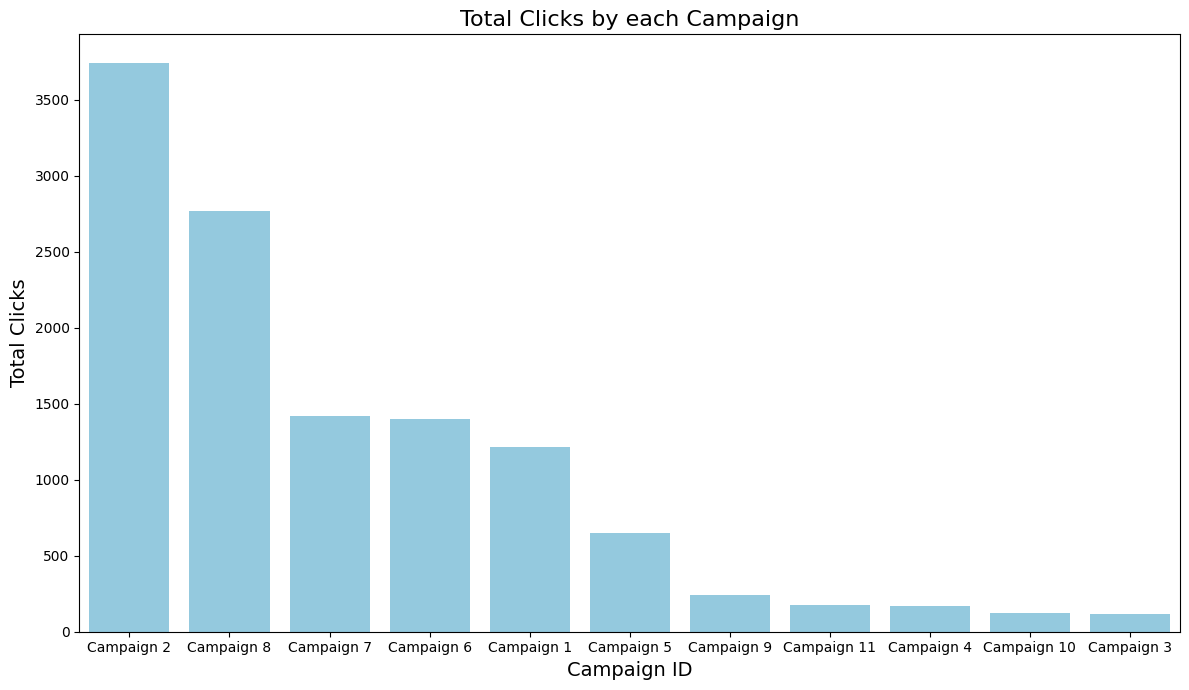

In [96]:
plt.figure(figsize=(12,7))
sns.barplot(data=Click_by_Campaign, x="campaign ID", y="Clicks", color = "skyblue")
plt.xlabel("Campaign ID", fontsize=14)
plt.ylabel("Total Clicks", fontsize = 14)
plt.title("Total Clicks by each Campaign", fontsize=16)
plt.tight_layout()
plt.show()

In [146]:
reach_and_impressions = df.groupby(['Campaign Name']).agg({
    'Reach': 'mean',
    'Impressions': 'mean'
}).sort_values(by='Impressions', ascending=False).reset_index()

reach_and_impressions

,Campaign Name,Reach,Impressions
0,SHU3_ (Students Apart from India and US),15498.000000,22437.666667
1,SHU_Students(Nepal),9889.333333,21738.333333
2,SHU_Students (India),15915.500000,18623.000000
3,SHU_6 (Educators and Principals),5976.000000,11784.750000
4,SHU_Students (Nigeria),7309.666667,9658.000000
5,SHU_Students(Ghana),5008.000000,6827.666667
6,SHU_Students(UAE),2444.333333,2886.666667
7,SHU_Students (Canada),1102.333333,1422.333333
8,SHU_Students(UK),1212.000000,1363.666667
9,SHU_Students(Australia),1062.333333,1190.666667


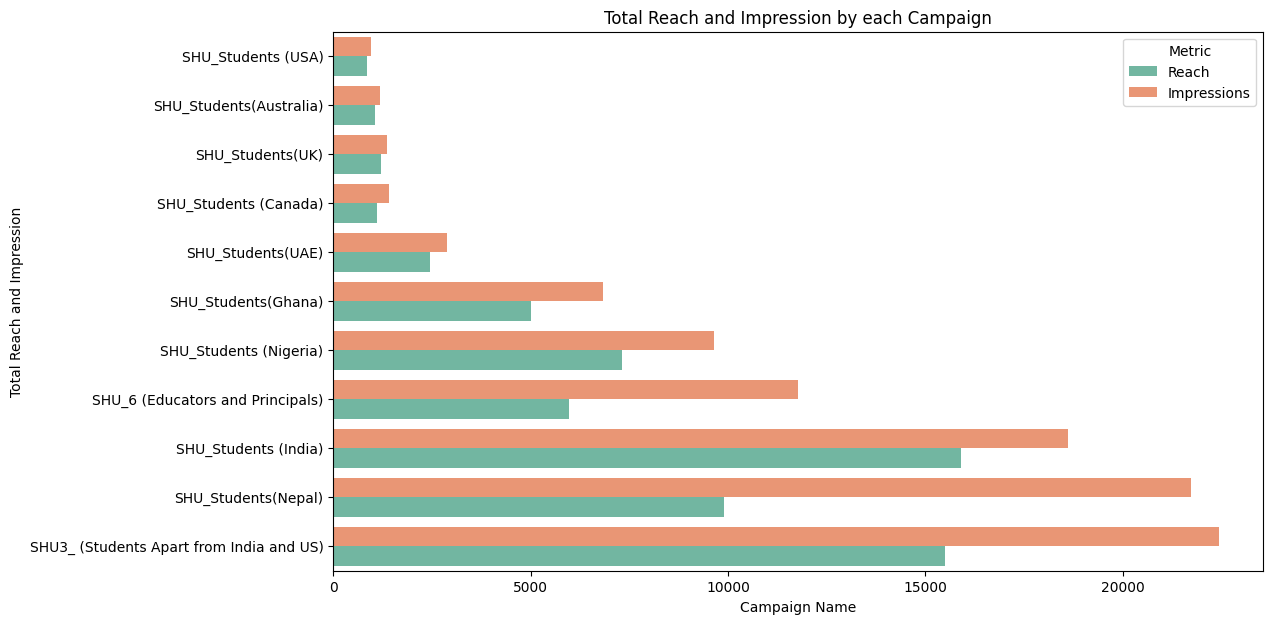

In [147]:
df_melted = reach_and_impressions.melt(id_vars="Campaign Name", value_vars=["Reach", "Impressions"],
                                       var_name="Metric", value_name="Value")
plt.figure(figsize=(12,7))
sns.barplot(data=df_melted, x="Value", y="Campaign Name", hue="Metric", palette="Set2")
plt.xlabel("Campaign Name")
plt.ylabel("Total Reach and Impression")
plt.title("Total Reach and Impression by each Campaign")
plt.gca().invert_yaxis()
plt.show()

In [162]:
avg_impression_by_campaign = df.groupby('Campaign Name')['Frequency'].mean().sort_values(ascending = False)
avg_impression_by_campaign

,Frequency
Campaign Name,
SHU_Students(Nepal),2.357745
SHU_6 (Educators and Principals),2.038067
SHU3_ (Students Apart from India and US),1.415478
SHU_Students(Ghana),1.358390
SHU_Students (Nigeria),1.290683
SHU_Students (Canada),1.207226
SHU_Students(UAE),1.201322
SHU_Students (India),1.131831
SHU_Students (USA),1.120708


/tmp/ipython-input-3822654175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_impression_by_campaign, x="Frequency", y="Campaign Name", palette = colors)
/tmp/ipython-input-3822654175.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=avg_impression_by_campaign, x="Frequency", y="Campaign Name", palette = colors)


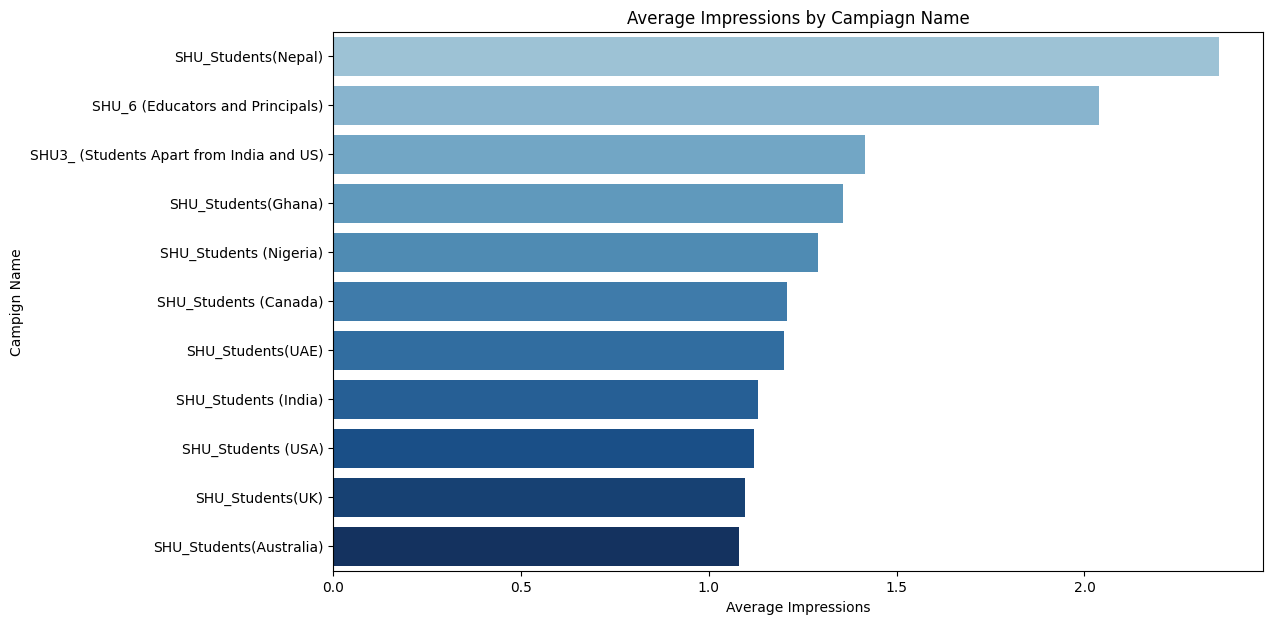

In [167]:
import matplotlib.cm as cm
avg_impression_by_campaign = df.groupby('Campaign Name')['Frequency'].mean().sort_values(ascending = False).reset_index()
colors = cm.Blues(np.linspace(0.4, 1, len(avg_impression_by_campaign)))
plt.figure(figsize=(12,7))
sns.barplot(data=avg_impression_by_campaign, x="Frequency", y="Campaign Name", palette = colors)
plt.xlabel('Average Impressions')
plt.ylabel('Campign Name')
plt.title('Average Impressions by Campiagn Name')
plt.show()

In [149]:
df.columns

Index(['campaign ID', 'Campaign Name', 'Audience', 'Age', 'Geography', 'Reach',
       'Impressions', 'Frequency', 'Clicks', 'Unique Clicks',
       'Unique Link Clicks (ULC)', 'Click-Through Rate (CTR in %)',
       'Unique Click-Through Rate (Unique CTR in %)', 'Amount Spent in INR',
       'Cost Per Click (CPC)', 'Cost per Result (CPR)'],
      dtype='object')

In [170]:
CPC_CPR = df.groupby(['Campaign Name']).agg({
    'Cost Per Click (CPC)': 'mean',
    'Cost per Result (CPR)': 'mean'
}).sort_values(by='Cost per Result (CPR)', ascending=False).reset_index()

CPC_CPR

,Campaign Name,Cost Per Click (CPC),Cost per Result (CPR)
0,SHU_Students(Australia),7.920000,23.106667
1,SHU_Students(UK),7.453333,18.650000
2,SHU_Students (USA),4.813333,9.570000
3,SHU_Students(UAE),3.583333,9.350000
4,SHU_Students (Canada),5.503333,7.930000
5,SHU_6 (Educators and Principals),1.835000,5.130000
6,SHU_Students(Ghana),1.283333,3.970000
7,SHU_Students(Nepal),0.723333,1.996667
8,SHU_Students (India),0.675000,1.055000
9,SHU3_ (Students Apart from India and US),0.413333,1.033333


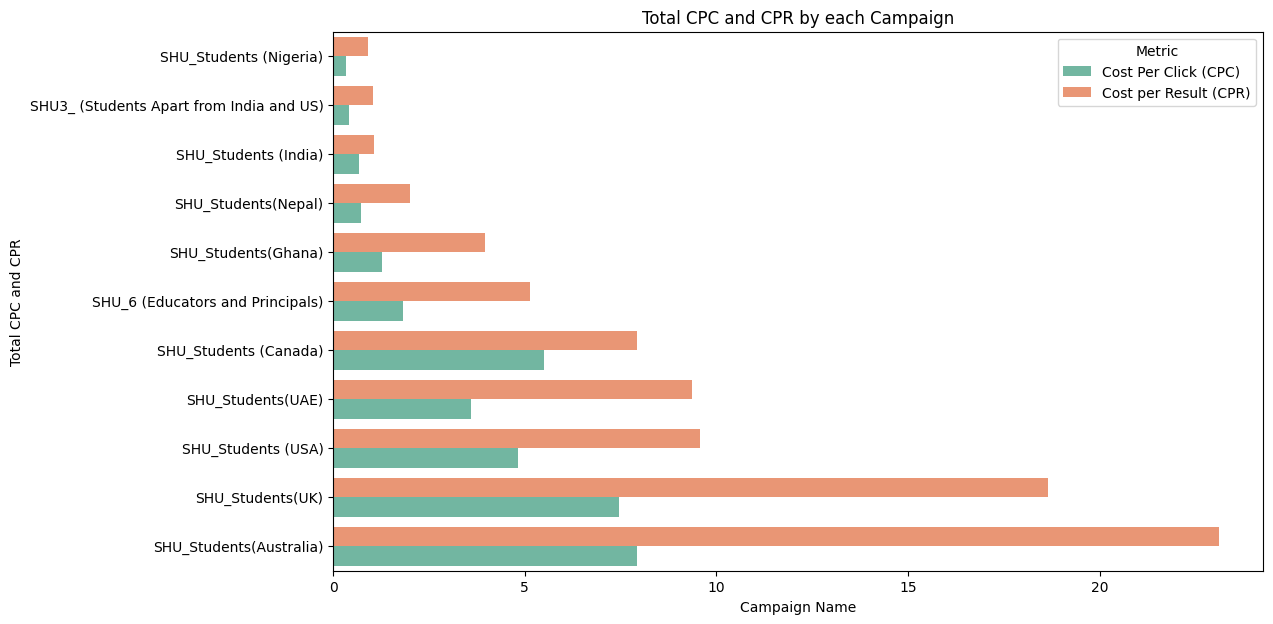

In [171]:
df_melted = CPC_CPR.melt(id_vars="Campaign Name", value_vars=["Cost Per Click (CPC)", "Cost per Result (CPR)"],
                                       var_name="Metric", value_name="Value")
plt.figure(figsize=(12,7))
sns.barplot(data=df_melted, x="Value", y="Campaign Name", hue="Metric", palette="Set2")
plt.xlabel("Campaign Name")
plt.ylabel("Total CPC and CPR")
plt.title("Total CPC and CPR by each Campaign")
plt.gca().invert_yaxis()
plt.show()

In [173]:
campaign_summary = df.groupby(['campaign ID', 'Campaign Name']).agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Unique Link Clicks (ULC)': 'sum',
    'Amount Spent in INR': 'sum',
    'Cost Per Click (CPC)': 'mean',
    'Cost per Result (CPR)': 'mean',
}).reset_index()

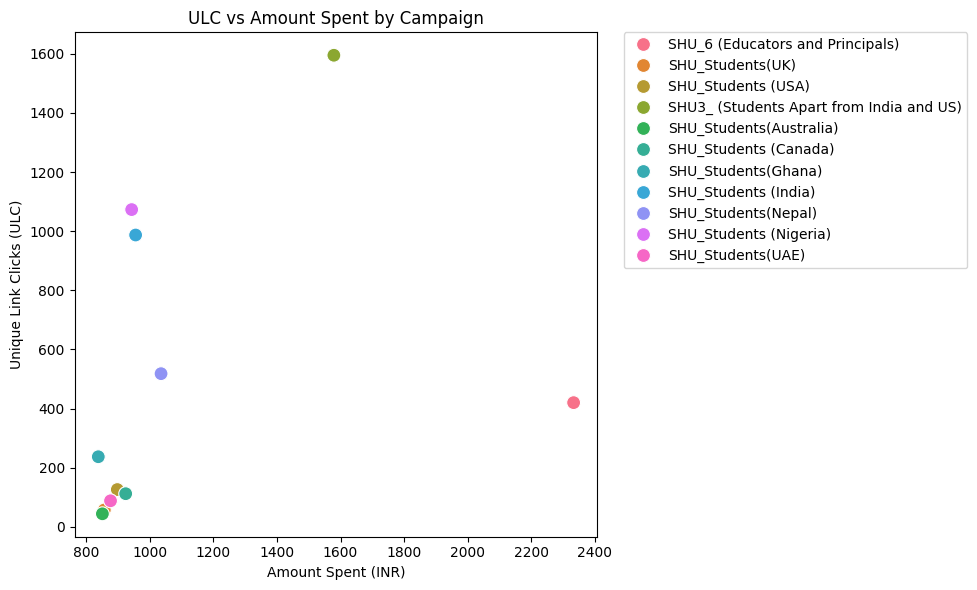

In [174]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=campaign_summary, x='Amount Spent in INR', y='Unique Link Clicks (ULC)', hue='Campaign Name', s=100)
plt.title('ULC vs Amount Spent by Campaign')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Unique Link Clicks (ULC)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  # Moves legend outside
plt.tight_layout()
plt.show()

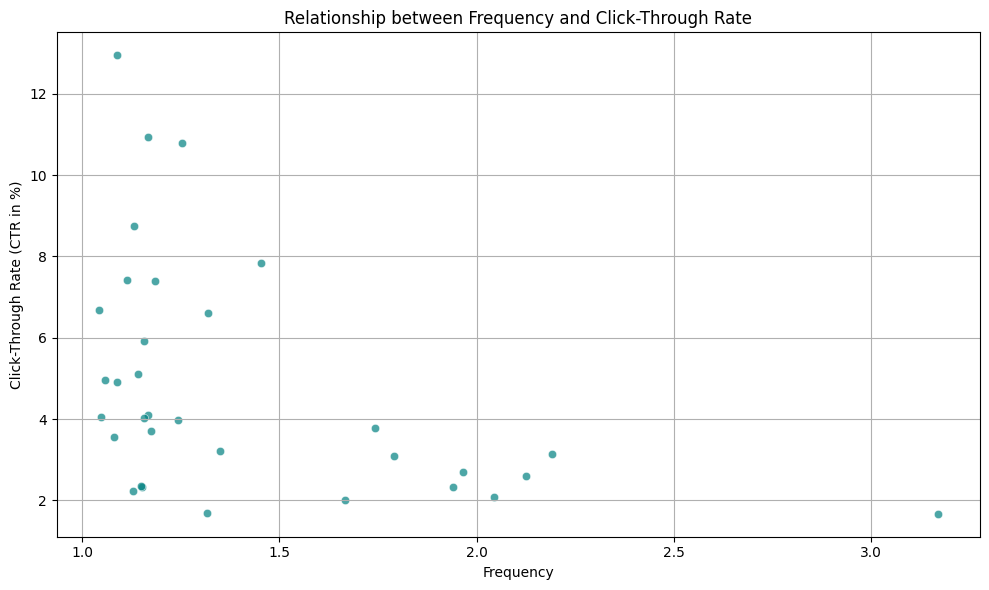

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Click-Through Rate (CTR in %)', data=df, color='teal', alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Click-Through Rate (CTR in %)')
plt.title('Relationship between Frequency and Click-Through Rate')
plt.grid(True)
plt.tight_layout()
plt.savefig('frequency_vs_ctr_scatter_plot_teal.png')
plt.show()

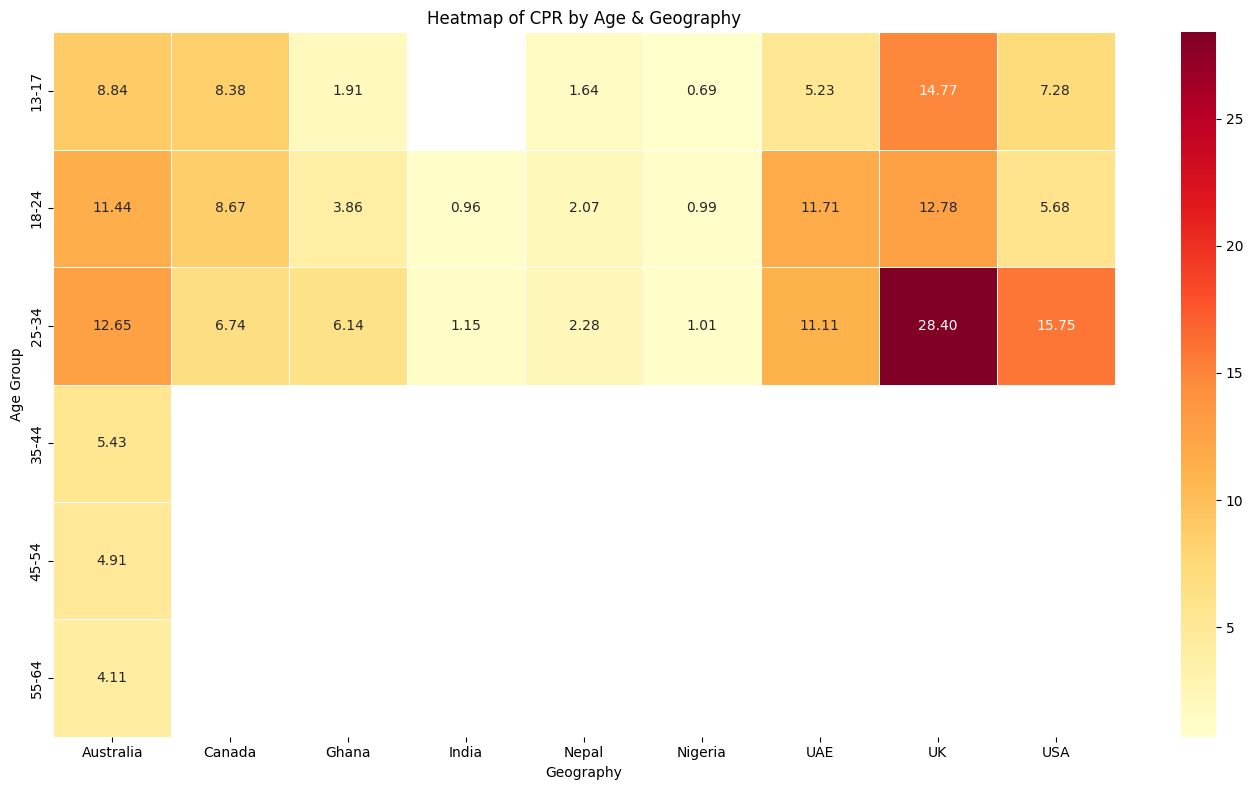

In [176]:
# Clean geography column
df['Clean Geography'] = df['Geography'].apply(lambda x: x.split(',')[0].split('(')[-1].strip() if 'Group' in x else x)

# Create pivot table
heatmap_data = df.pivot_table(index='Age', columns='Clean Geography', values='Cost per Result (CPR)', aggfunc='mean')

# Plot cleaned heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of CPR by Age & Geography')
plt.xlabel('Geography')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

#Appendix - Additional Visualization

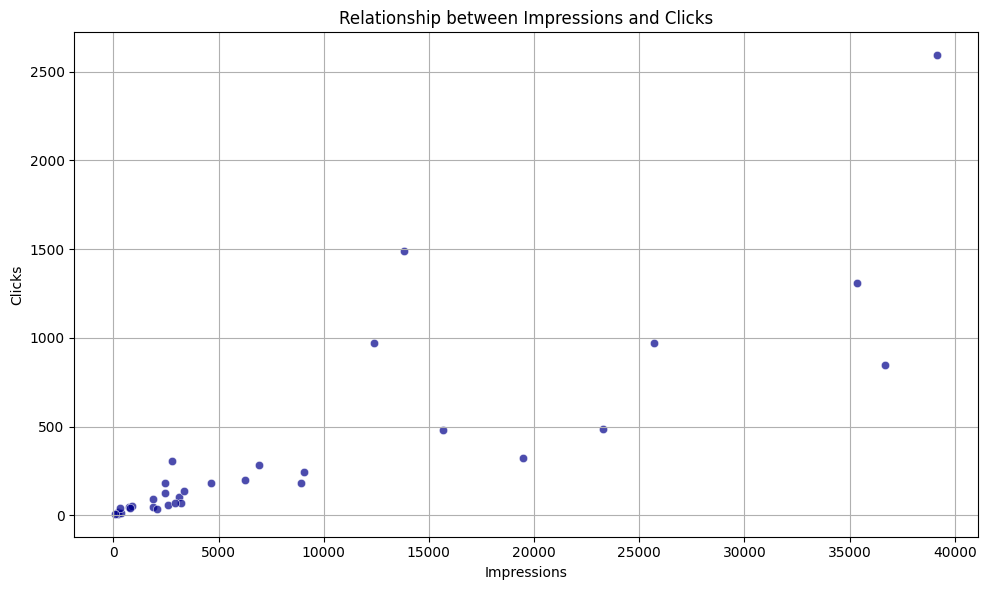

In [178]:
# Create the scatter plot for Clicks vs. Impressions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impressions', y='Clicks', data=df, alpha=0.7, color='darkblue')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Relationship between Impressions and Clicks')
plt.grid(True)
plt.tight_layout()
plt.savefig('clicks_vs_impressions_scatter_plot.png')
plt.show()

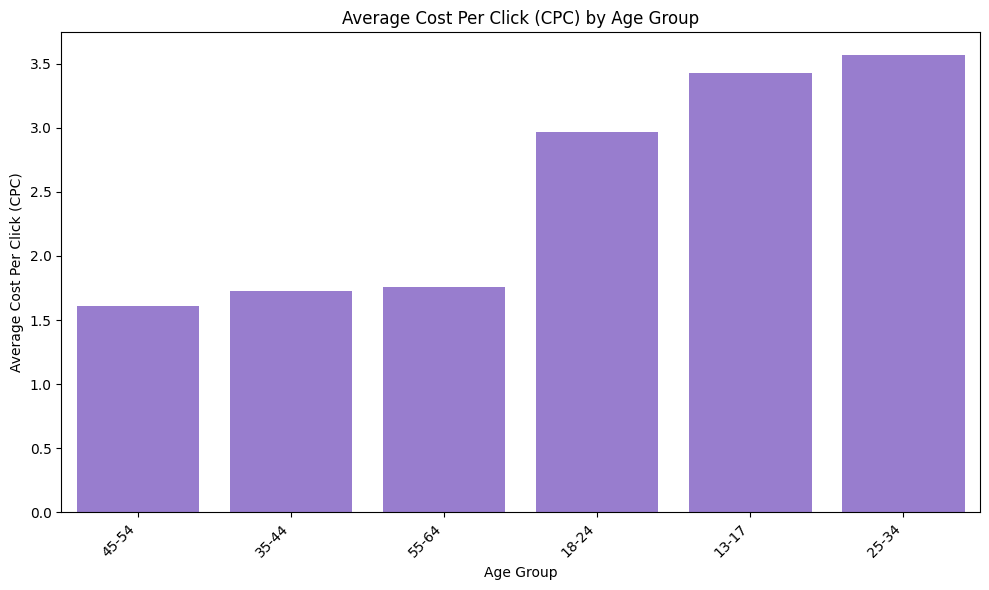

In [177]:
cpc_by_age = df.groupby('Age')['Cost Per Click (CPC)'].mean().sort_values(ascending=True).reset_index()

# Create the bar chart for Cost Per Click (CPC) by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Cost Per Click (CPC)', data=cpc_by_age, color='mediumpurple')
plt.xlabel('Age Group')
plt.ylabel('Average Cost Per Click (CPC)')
plt.title('Average Cost Per Click (CPC) by Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('cpc_by_age_group_bar_chart.png')
plt.show()

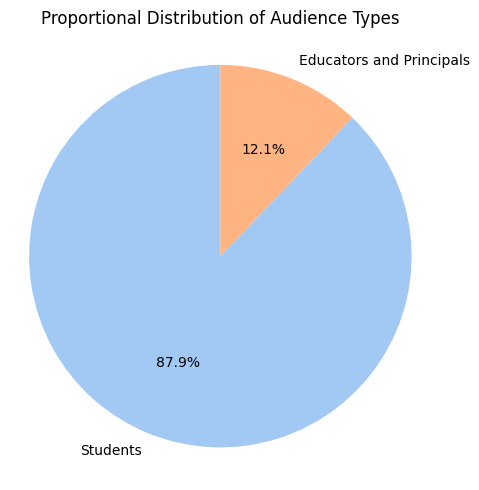

In [179]:
# Get the distribution of Audience Types
audience_counts = df['Audience'].value_counts()

# Determine if it's a pie chart or bar chart based on the number of unique audience types
if len(audience_counts) <= 5:
    # Create a pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(audience_counts, labels=audience_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Proportional Distribution of Audience Types')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.savefig('audience_distribution_pie_chart.png')
    plt.show() # Use plt.show() in a Jupyter environment to display the plot inline
else:
    # Create a bar chart
    plt.figure(figsize=(12, 7))
    sns.barplot(x=audience_counts.index, y=audience_counts.values, palette='viridis')
    plt.xlabel('Audience Type')
    plt.ylabel('Number of Occurrences')
    plt.title('Distribution of Audience Types')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('audience_distribution_bar_chart.png')
    plt.show()


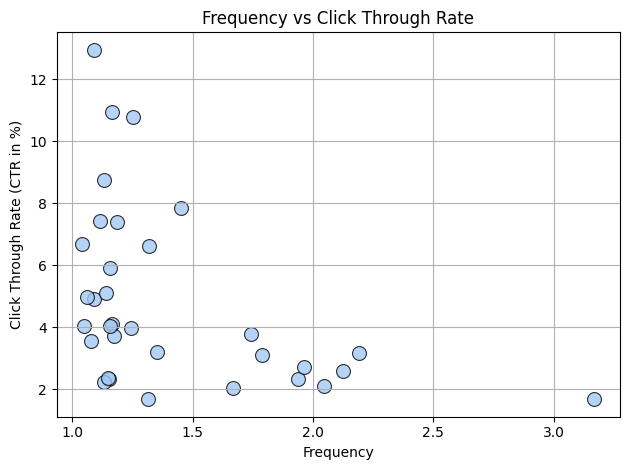

In [180]:
sns.scatterplot(data=df, x='Frequency', y='Click-Through Rate (CTR in %)',
                color=sns.color_palette("pastel")[0], s=100, edgecolor='black', alpha = 0.8)

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Click Through Rate (CTR in %)')
plt.title('Frequency vs Click Through Rate')

# Show grid and plot
plt.grid()
plt.tight_layout()
plt.show()